# Lab 7

In [ ]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.datasets import make_circles
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

### Qn 1

In [ ]:
X, y = make_classification(n_samples=1000, n_features=4,n_informative=2, n_redundant=0,random_state=0, shuffle=False)

C:\Users\satva\anaconda3\lib\site-packages\matplotlib\collections.py:981: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


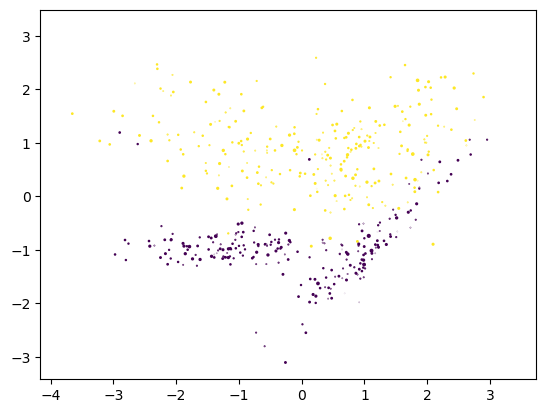

In [ ]:
plt.scatter(X[:,0], X[:,1], X[:,2], c=y)

In [ ]:
clf_dt = DecisionTreeClassifier()

In [ ]:
clf_log = LogisticRegression()

In [ ]:
cross_val_score(clf_dt, X, y, cv=5).mean()

0.933

In [ ]:
cross_val_score(clf_log, X, y, cv=5).mean()

0.942

In [ ]:
base_dt = DecisionTreeClassifier(max_depth = 1)
ada_dt = AdaBoostClassifier(base_estimator = base_dt)

In [ ]:
base_log = LogisticRegression()
ada_log = AdaBoostClassifier(base_estimator = base_log)

In [ ]:
cross_val_score(ada_dt, X, y, cv=5).mean()

0.938

In [ ]:
cross_val_score(ada_log, X, y, cv=5).mean()

0.944

### Qn 2

In [ ]:
df = pd.read_csv('creditcard.csv')

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
ada = AdaBoostClassifier()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

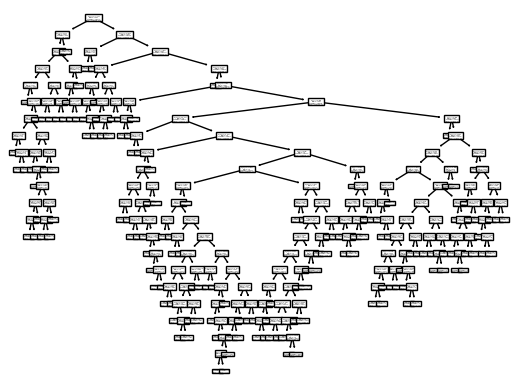

In [ ]:
plot_tree(clf);

In [ ]:
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [ ]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9992158515033414

In [ ]:
y_pred = ada.predict(X_test)
accuracy_score(y_test, y_pred)

0.9993211848834895

### Qn 3

In [ ]:
boost = AdaBoostClassifier()

In [ ]:
parameters = {
    'n_estimators': [100, 200, 500], 
    'learning_rate':[0.01, 0.1, 1.0]
    }

In [ ]:
search = GridSearchCV(boost, parameters, n_jobs=-1)

In [ ]:
search.fit(X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [100, 200, 500]})

In [ ]:
search.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

In [ ]:
y_pred = search.predict(X_test)
accuracy_score(y_test, y_pred)    

0.965

In [ ]:
cv_results = search.cv_results_
print(cv_results)

{'mean_fit_time': array([0.2548882 , 0.468682  , 1.09942312, 0.22112999, 0.41725426,
       1.0308218 , 0.20354276, 0.4214922 , 0.84444604]), 'std_fit_time': array([0.01022654, 0.00756239, 0.03134924, 0.00473653, 0.01384988,
       0.01418669, 0.00627297, 0.01724549, 0.03991852]), 'mean_score_time': array([0.01754637, 0.03390298, 0.08120885, 0.0164032 , 0.03400483,
       0.08310857, 0.01690249, 0.03360615, 0.05147867]), 'std_score_time': array([0.00025936, 0.00019567, 0.00153833, 0.00037777, 0.00221392,
       0.00153169, 0.00019648, 0.00146561, 0.00385027]), 'param_learning_rate': masked_array(data=[0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1.0, 1.0, 1.0],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_n_estimators': masked_array(data=[100, 200, 500, 100, 200, 500, 100, 200, 500],
             mask=[False, False, False, False, False, False, False, False,
                   False],
 

In [ ]:
mean_scores = cv_results['mean_test_score']
std_scores = cv_results['std_test_score']

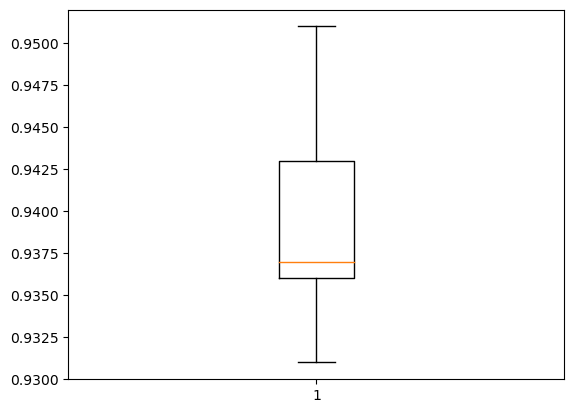

In [ ]:
plt.boxplot(mean_scores);

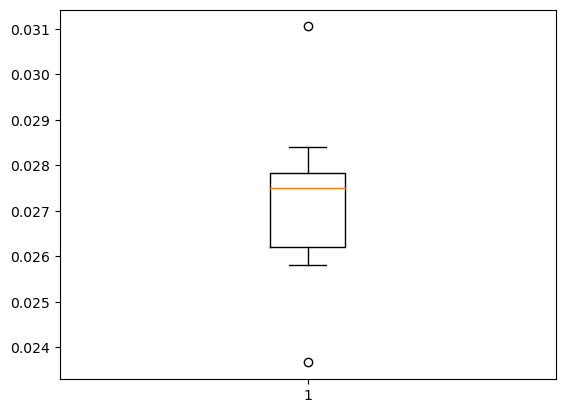

In [ ]:
plt.boxplot(std_scores);